# An Explorative Analysis of Mein Grundeinkommen e.V. and its Universal Basic Income Raffle


## Who is behind Mein Grundeinkommen e.V.?

Mein Grundeinkommen e.V. (MeinBGE) is a Berlin based non-profit organisation pushing the debate about universal basic income (UBI) in Germany. <br> Founded rather spontaneously in 2014 after a very successful first crowdfunding campaign, about thirty full-time activists currently work in the organisation. The main project is a raffle of UBIs which are donated by a large number of private persons. More than 444 winners received over five million Euro in total over the last five years. 

With these winners - people who actually receive money unconditionally - MeinBGE is able to find out how and to which extent an UBI affects people in different living situations. Do they become happier? How does it influence their social relationships? Do they just quit their job and relax in a hammock? Does their health change? Therefore the project takes the UBI discussion beyond "what if" scenarios into reality. 

## What are the Unconditional Basic Income Raffles?

A UBI in a MeinBGE raffle means the winner receives 1,000€ per month over one year, totaling up to 12,000€. <br> Underlining the point of unconditionality, everyone can participate in the raffles and has a chance to receive a UBI - no matter their age, nationality, income or plans on how to spend the money. Everything is crowdfunded, though a donation is not required for participation in the raffles. 

The raffles and crowdfunding are handled on the platform [mein-grundeinkommen.de](https://www.mein-grundeinkommen.de/). With over a million accounts this project is one of the biggest UBI projects in the world and with that provides a enormous amount of data. 

## Why do an Explorative Data Analysis?

In our current time of digitalization, achievement-oriented society and growing social division the UBI might be a cornerstone in dealing with these challenges. It’s not a masterplan for solving everything but it made me to want to help the organisation in their pursuit of answers on how UBI might impact our society.

MeinBGE already does extensive research with the winners and their live with UBI, but has only limited knowledge on the platform usage and its crucial point to spread the knowledge about UBI. When do people get interested and sign up? When do they take part in raffles? Why do people start donating? Answer to all these questions and more follow in this analysis.

## The Data

The data source for this analysis was an anonymised PostgreSQL database dump provided by the nice people at MeinBGE.
It included data from 03.09.2014 up until 22.11.2019.

The used data includes data tables about the users, the users entries into the raffles, the raffles themselves, the provided UBIs and the users debit mandates.   

The following analysis was made with Python.
Using [psycog2](https://pypi.org/project/psycopg2/) I wrote the necessary queries to do data wrangling with [pandas](https://pandas.pydata.org/) and [numpy](https://numpy.org/). Afterwards I exported the data to CSV files to use in the notebook. Here I used [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/) and pandas for plotting and [scikit-learn](https://scikit-learn.org/) for regression.

## Setup

In [1]:
# Python module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Setting options
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [3]:
# loading datasets
overview = pd.read_csv('data/general_overview.csv', index_col=False)
age_distribution = pd.read_csv('data/age_distribution.csv')
user_sign_up = pd.read_csv('data/user_sign_up.csv', index_col=0)
data_CH_monthly = pd.read_csv('data/data_CH_monthly.csv', index_col=0)
ch_sign_up = pd.read_csv('data/ch_sign_up.csv', index_col=0)
data_donation_monthly = pd.read_csv(
    'data/data_donation_monthly.csv', index_col=0)
data_donation_monthly = pd.read_csv(
    'data/data_donation_monthly.csv', index_col=0)
data_donation_value = pd.read_csv('data/data_donation_value.csv', index_col=0)
donations_all = pd.read_csv('data/donations_all.csv', index_col=False)
raffles_over_time = pd.read_csv('data/raffles_over_time.csv', index_col=0)
duration_til_mandate = pd.read_csv('data/duration_til_mandate.csv')
raffles_before_ch = pd.read_csv('data/raffles_before_ch.csv', index_col=0)

## Analysis

### Overview

To get an overview of some key numbers I aggregated a few values.

In [4]:
# print data overview
overview.style.format({'value': "{:,.0f}"}).hide_index()

info,value
Users (Adults),"1,338,040"
Users (Children),"225,771"
Users (total),"1,563,811"
Monthly donors,"120,218"
Raffles,52
Winners (Adults),376
Winners (Children),68
Winners (total),444
Sum of raffled UBIs [€],"5,328,000"


Until 22.11.2019 there were 1,338,040 adults and 225,771 children from which 120,218 users were donors with a monthly debit mandate.<br>
These people have now donated 5,328,000€ for basic incomes which led to 444 UBIs distributed over 52 raffles since September 2014. <br>
In the last years 376 adult users and 68 children received a monthly 1,000€ for a year.

### Getting to know the users

#### Where are the people who joined the MeinBGE platform from? 

When signing up as a MeinBGE user, people optionally submit their country of residence zip code. Fortunately a lot of the german users did so (1,121,25 in total).
Using these zip codes and data openly available at https://www.suche-postleitzahl.org/downloads (e.g. shp-files of zip code regions and the amount of people per zip code) and the geopandas module I was able to create map of Germany and map the percentage of users in the population of each zip code.

<img src="data/users_per_population_vs_zip-code.png">

The map shows that MeinBGE users live slightly more in urban than rural areas in Germany. Comparatively high concentrations can be found in Berlin, Bremen, Dresden, Leipzig and Freiburg, while for example in east Bavaria there are only few users.

#### How old are the users typically?

MeinBGE requires users to enter their birthday during signup for the raffle. Together with the name it is used for winner identification and for prevention of fraud by opening multiple accounts.

There is no age limit for participation, though children up to the age of 14 years do not have their own account, but are part of one of their legal guardian's account.

Using the birthdays of all those users results in the following age distribution.

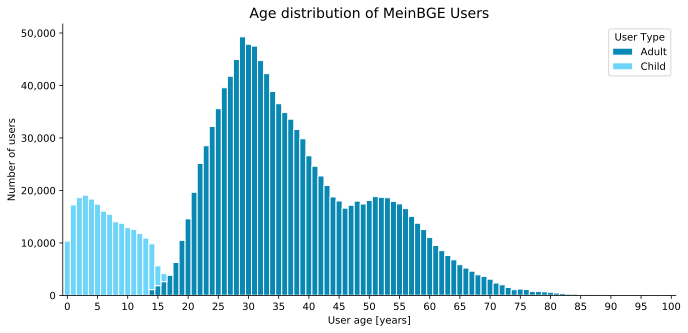

In [5]:
%config InlineBackend.figure_format = 'svg'

# set figure
fig, ax = plt.subplots(figsize=(11, 5))
# plot graph
age_distribution.plot.bar(x='age', y=['num_age_user', 'num_age_child'], stacked=True, rot=0,
                          width=1, edgecolor='white', color=['#0888b2', '#6dd6f8'],
                          ax=ax)
sns.despine(ax=ax, top=True, right=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xticklabels(ax.get_xticks().astype(int))
ax.set_xlabel('User age [years]')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Number of users')
ax.legend(['Adult', 'Child'], title='User Type')
ax.set_title('Age distribution of MeinBGE Users', size=14)
plt.show()

The distribution graph shows a peak for adult users in their late twenties and early thirties with about 50,000 users of age 29. A second, though smaller peak appears for users in their fifties with about 20,000 of age 52.
The distribution for children leans stronger to the earlier ages, most of them are of age 5 and younger. Especially low is the number of teenagers between 15 and 18 years with nearly 3,000 per age bracket.
The graph shows children accounts also for age 15 and 16. This is due to the fact that these children accounts were not converted into adult accounts and therefore can not take part in raffles but appear in the database.

### User base development

#### When do users sign up? How many of them leave?

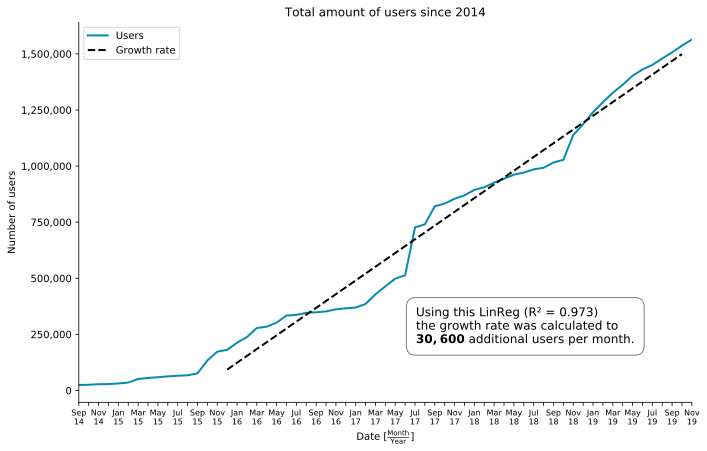

In [6]:
%config InlineBackend.figure_format = 'svg'

# set start and end for LinReg
start_index = user_sign_up[user_sign_up['index'] == 'Dec\n15'].index[0]
end_index = user_sign_up[user_sign_up['index'] == 'Nov\n19'].index[0]

# create LinReg and related data
reg_sign_up_data = user_sign_up[['acc_created', 'acc_deleted']].cumsum().sum(axis=1)[start_index:end_index]
reg = LinearRegression().fit(
    np.arange(len(reg_sign_up_data)).reshape(-1, 1), reg_sign_up_data.values)
score=reg.score(np.arange(len(reg_sign_up_data)
                ).reshape(-1, 1), reg_sign_up_data.values)
prediction=reg.predict(np.arange(len(reg_sign_up_data)).reshape(-1, 1))

# create figure
fig, ax=plt.subplots(figsize=(11, 7))

# plot data
user_sign_up[['acc_created', 'acc_deleted']].cumsum().sum(axis=1).plot(color='#0888b2', linewidth=2, label='Users')
plt.plot(user_sign_up.index[start_index:end_index], prediction,
         color='black', linewidth=2, linestyle='--', label='Growth rate')
# set axes
ax.yaxis.set_major_locator(ticker.MultipleLocator(250000))
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticks(user_sign_up.index)
ax.set_xticklabels(user_sign_up['index'], size=8)
plt.setp(ax.get_xticklabels()[1::2], visible=False)
sns.despine(ax=ax, top=True, right=True)
ax.set_ylabel('Number of users')
ax.set_xlabel('Date ' + r'$[ \frac{\mathrm{Month}}{\mathrm{Year}}]$')
ax.legend()
ax.set_title('Total amount of users since 2014')
# annotate LinReg
ax.annotate(xy=(0.55, 0.2), xycoords='axes fraction', ha='left', va='center',
            s='Using this LinReg (R\u00b2 = {0:.3f})\n'
            'the growth rate was calculated to\n'
            r'$\mathbf{{{1:,.0f}}}$ '
            'additional users per month.'.format(score, round(reg.coef_[0], -2)), size=12,
            bbox=dict(facecolor='white', edgecolor='#707070', alpha=0.9, boxstyle='round,pad=0.8'))
plt.show()

Although the linear regression has a high enough correlation coefficient to call it a representation of user growth, there is clear evidence that most of the MeinBGE user base growth results from specific leaps. There are certain events that may explain these growth spurts, which are displayed within the following graph.

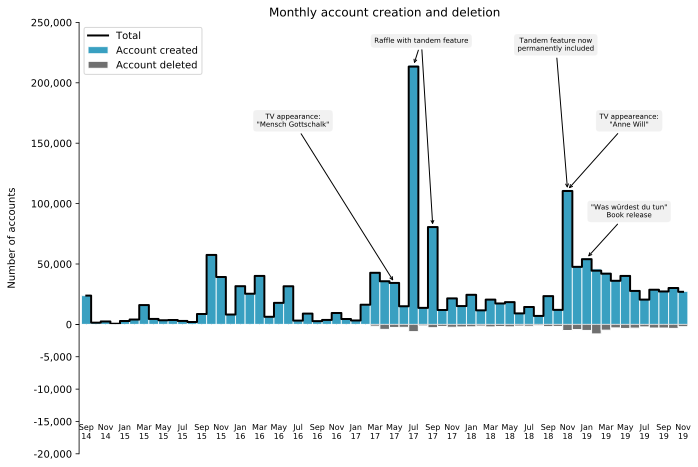

In [7]:
%config InlineBackend.figure_format = 'svg'

# create figure
fig = plt.figure(figsize=(10, 6))
# create subplots
ax = fig.add_axes([0.15, 0.3, 0.85, 0.7])
ax2 = fig.add_axes([0.15, 0, 0.85, 0.3])
# draw plots
user_sign_up[['acc_created', 'acc_deleted']].sum(axis=1).plot(drawstyle='steps-mid', color=['black'],
                                                              linewidth=2, ax=ax)
user_sign_up['acc_created'].plot(
    kind='bar', rot=0, width=1, edgecolor='white', color=['#0888b2'], alpha=0.8, ax=ax)
user_sign_up['acc_deleted'].plot(
    kind='bar', rot=0, width=1, edgecolor='white', color=['#707070'], ax=ax2)
sns.despine(ax=ax, top=True, bottom=True, right=True)
sns.despine(ax=ax2, top=True, bottom=True, right=True)
ax.set_ylim([0, 250000])
ax2.set_ylim([-20000, 0])
plt.setp(ax.get_yticklabels()[0], visible=False)
ax.set_xticklabels([])
ax2.set_xticklabels(user_sign_up['index'])
plt.setp(ax2.get_xticklabels()[1::2], visible=False)
ax2.tick_params(axis='x', pad=-30, length=0, labelsize=8)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax2.set_yticklabels(ax2.get_yticks().astype(int))
ax2.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# make annotations to event dates
fontsize = 7
box_alpha = 0.1
box_color = '#707070'

ax.annotate(xy=(user_sign_up[user_sign_up['index'] == 'May\n17'].index[0],
                user_sign_up[user_sign_up['index'] == 'May\n17']['acc_created']), xycoords='data',
            xytext=(0.35, 0.65), textcoords='axes fraction', ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(facecolor=box_color, edgecolor='white', alpha=box_alpha, boxstyle='round,pad=0.5'),
            s='TV appearance:\n"Mensch Gottschalk"', size=fontsize, alpha=1.0)
ax.annotate(xy=(user_sign_up[user_sign_up['index'] == 'Sep\n17'].index[0],
                user_sign_up[user_sign_up['index'] == 'Sep\n17']['acc_created']), xycoords='data',
            xytext=(0.56, 0.95), textcoords='axes fraction', ha='center', va='top',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(facecolor='#707070', edgecolor='white', alpha=0.0, boxstyle='round,pad=0.5'),
            s='Raffle with tandem feature', size=fontsize, alpha=0.0)
ax.annotate(xy=(user_sign_up[user_sign_up['index'] == 'Jul\n17'].index[0],
                user_sign_up[user_sign_up['index'] == 'Jul\n17']['acc_created']), xycoords='data',
            xytext=(0.56, 0.95), textcoords='axes fraction', ha='center', va='top',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(facecolor=box_color, edgecolor='white', alpha=box_alpha, boxstyle='round,pad=0.5'),
            s='Raffle with tandem feature', size=fontsize, alpha=1.0)
ax.annotate(xy=(user_sign_up[user_sign_up['index'] == 'Nov\n18'].index[0],
                user_sign_up[user_sign_up['index'] == 'Nov\n18']['acc_created']), xycoords='data',
            xytext=(0.78, 0.95), textcoords='axes fraction', ha='center', va='top',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(facecolor=box_color, edgecolor='white', alpha=box_alpha, boxstyle='round,pad=0.5'),
            s='Tandem feature now\npermanently included', size=fontsize, alpha=1.0)
ax.annotate(xy=(user_sign_up[user_sign_up['index'] == 'Nov\n18'].index[0],
                user_sign_up[user_sign_up['index'] == 'Nov\n18']['acc_created']), xycoords='data',
            xytext=(0.9, 0.65), textcoords='axes fraction', ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(facecolor=box_color, edgecolor='white', alpha=box_alpha, boxstyle='round,pad=0.5'),
            s='TV appeareance:\n"Anne Will"', size=fontsize, alpha=1.0)
ax.annotate(xy=(user_sign_up[user_sign_up['index'] == 'Jan\n19'].index[0],
                user_sign_up[user_sign_up['index'] == 'Jan\n19']['acc_created']), xycoords='data',
            xytext=(0.9, 0.35), textcoords='axes fraction', ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(facecolor=box_color, edgecolor='white', alpha=box_alpha, boxstyle='round,pad=0.5'),
            s='"Was würdest du tun"\nBook release', size=fontsize, alpha=1.0)

ax.set_title('Monthly account creation and deletion')
fig.text(x=0.05, y=0.5, s='Number of accounts', rotation=90, va='center')
fig.legend(['Total', 'Account created', 'Account deleted'], loc='upper left', bbox_to_anchor=(0, 1),
           bbox_transform=ax.transAxes)
plt.show()

The greatest user gains strongly coincide with raffles in which the so-called "tandem" feature was used. The peaks in user gains strongly coincide with raffles with the so-called "tandem" feature. As a user you could invite friends, which then signed up as users on the platform. When you would be raffled, a second UBI would be raffled among your group of friends on the platform.<br>
In November 2018 the tandem feature became standard for all following raffles. This might be a strong contributor in the greater average sign-ups compared to 2014 throughout 2018.

Apart from raffle features increasing media coverage around MeinBGE might be a factor in increased and decreased sign-up rates.

#### How many users decide to become monthly donors?

Users can decide to donate money on a monthly basis. MeinBGE officially and affectionally calls them <i>Crowdhörnchen</i>. Over the last years their number and therefore the monthly donations have steadily risen, which makes more and more UBIs possible. <br>The following graph shows the total number of debits per month which is interpretable as the number of Crowdhörnchen per month. As the payment method is direct debit authorization, it is possible that debits cannot be fulfilled due to various reasons (e.g. insufficient funds). These bounced debits have not been factored out, as no information about them was available in my data source. Additionally, because of multiple feature changes the data is only viable since January 2018. <br>
I used standard linear regression to calculate the growth rate of Crowdhörnchen, marked with black in the following graph.

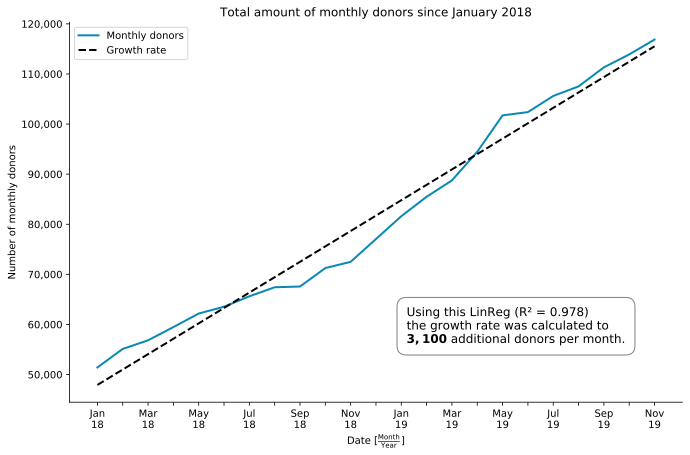

In [8]:
%config InlineBackend.figure_format = 'svg'

# create LinReg
reg = LinearRegression().fit(
    np.array(data_CH_monthly.index).reshape(-1, 1), data_CH_monthly['count'])
score = reg.score(np.array(data_CH_monthly.index).reshape(-1,
                                                          1), data_CH_monthly['count'])
prediction = reg.predict(np.array(data_CH_monthly.index).reshape(-1, 1))

# create figure
fig, ax = plt.subplots(figsize=(11, 7))
# plot data
plt.plot(range(len(data_CH_monthly['date_trunc'])), data_CH_monthly['count'],
         color='#0888b2', linewidth=2, label='Monthly donors')
plt.plot(range(len(data_CH_monthly['date_trunc'])), prediction,
         color='black', linewidth=2, linestyle='--', label='Growth rate')
ax.set_xticks(range(len(data_CH_monthly['date_trunc'])))
ax.set_xticklabels(data_CH_monthly['date_trunc'])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Number of monthly donors')
ax.set_xlabel('Date ' + r'$[ \frac{\mathrm{Month}}{\mathrm{Year}}]$')
sns.despine(ax=ax, top=True, right=True)
ax.annotate(xy=(0.55, 0.2), xycoords='axes fraction', ha='left', va='center',
            s='Using this LinReg (R\u00b2 = {0:.3f})\n'
            'the growth rate was calculated to\n'
            r'$\mathbf{{{1:,.0f}}}$ '
            'additional donors per month.'.format(score, round(reg.coef_[0], -2)), size=12,
            bbox=dict(facecolor='white', edgecolor='#707070', alpha=0.9, boxstyle='round,pad=0.8'))
ax.legend()
ax.set_title('Total amount of monthly donors since January 2018')
plt.show()

Naturally there are people that do not want or are not able to donate anymore, so a loss of donors is to be expected. The next plot shows the number of newly created and revoked debit mandates, as well as their total to visualize gain and loss. As this data includes non viable mandates MeinBGE regularly deactivates these mandates which may lead to peaks in revoked mandates.

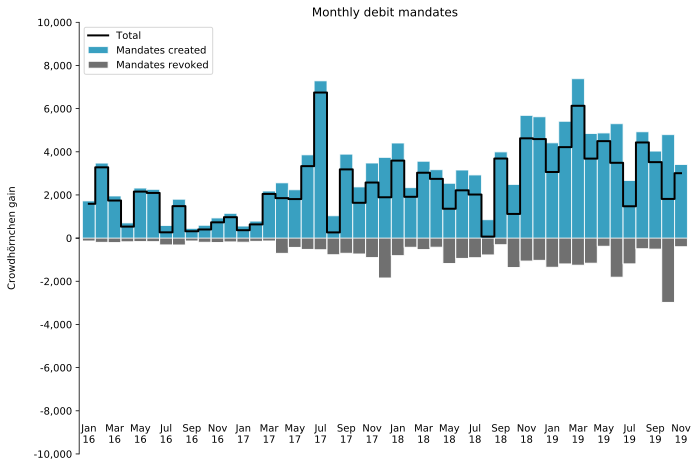

In [9]:
%config InlineBackend.figure_format = 'svg'
# create figure
fig = plt.figure(figsize=(10, 6))
# set up subplots
ax = fig.add_axes([0.15, 0.5, 0.85, 0.5])
ax2 = fig.add_axes([0.15, 0.0, 0.85, 0.5])
# plot data
(ch_sign_up['created_at'] + ch_sign_up['revoked_at']).plot(drawstyle='steps-mid', color=['black'],
                                                           linewidth=2, ax=ax)
ch_sign_up['created_at'].plot(kind='bar', rot=0, width=1, edgecolor='white', color=[
                              '#0888b2'], alpha=0.8, ax=ax)
ch_sign_up['revoked_at'].plot(
    kind='bar', rot=0, width=1, edgecolor='white', color=['#707070'], ax=ax2)
sns.despine(ax=ax, top=True, bottom=True, right=True)
sns.despine(ax=ax2, top=True, bottom=True, right=True)
ax.set_ylim([0, 10000])
ax2.set_ylim([-10000, 0])
plt.setp(ax.get_yticklabels()[0], visible=False)
ax.set_xticklabels([])
plt.setp(ax2.get_xticklabels()[1::2], visible=False)
ax2.tick_params(axis='x', pad=-30, length=0)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.text(x=0.05, y=0.5,
         s='Crowdhörnchen gain', rotation=90, va='center')
fig.legend(['Total', 'Mandates created', 'Mandates revoked'], loc='upper left', bbox_to_anchor=(0, 1),
           bbox_transform=ax.transAxes)
ax.set_title('Monthly debit mandates')
plt.show()

Contrary to user account creations there are much more people changing or revoking their debit mandates every month, though there a similar peaks for newly created debit mandates visible. These peaks can be explained as directly proportional to the growth of user accounts over those months. More total mandates lead to more revoked mandates and also more bouncing debits. A rise in revoked mandates is therefore to be expected.

#### When does a user become a monthly donor?

Users are not required to donate anything to MeinBGE, though there is an incentive. Monthly donors do not need to sign up for every raffle manually as they are automatically included.

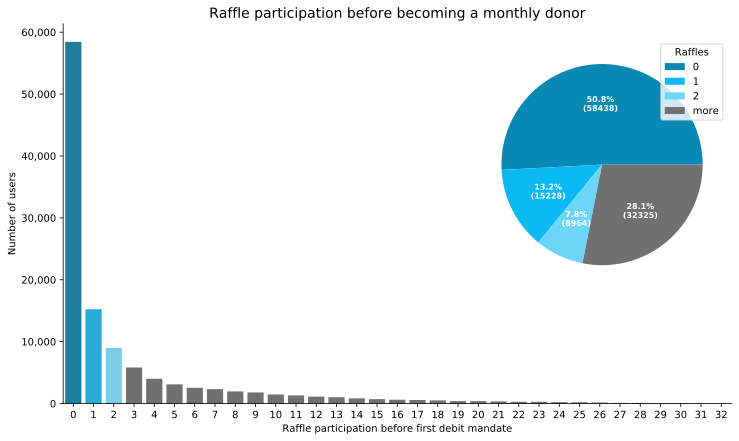

In [10]:
%config InlineBackend.figure_format = 'svg'
# create figure
fig, ax = plt.subplots(figsize=(12, 7))
# plot data
sns.countplot(x='count', data=raffles_before_ch,
              palette=['#0888b2', '#0bbaf4', '#6dd6f8'] +
              ['#707070'] * (raffles_before_ch['count'].nunique() - 3)
              )
sns.despine(ax=ax, top=True, right=True)
ax.set_xlabel('Raffle participation before first debit mandate')
ax.set_ylabel('Number of users')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))))
ax.set_title('Raffle participation before becoming a monthly donor', size=14)
# add inset chart to visualize percentages
ax_inset = fig.add_axes([0.5, 0.35, 0.5, 0.5])
# prepare data
raffles_pie = raffles_before_ch['categorie'].value_counts(
    sort=False).reset_index().sort_values(by='index')
# create pie chart
ax_inset.pie(raffles_pie['categorie'],
             labels=raffles_pie['index'],
             colors=['#0888b2', '#0bbaf4', '#6dd6f8',  '#707070'],
             autopct=lambda pct: "{:.1f}%\n({:d})".format(
                 pct, int(round(pct / 100. * len(raffles_before_ch), 0))),
             textprops=dict(color='white', weight='bold', size=8))
ax_inset.legend(loc='upper right', title='Raffles')
plt.show()

This graph shows that since January 2016 over half (50.8%) of all monthly donors did not participate in a raffle before becoming a monthly donor. Almost three quarters of them will be monthly donors after their second raffle.

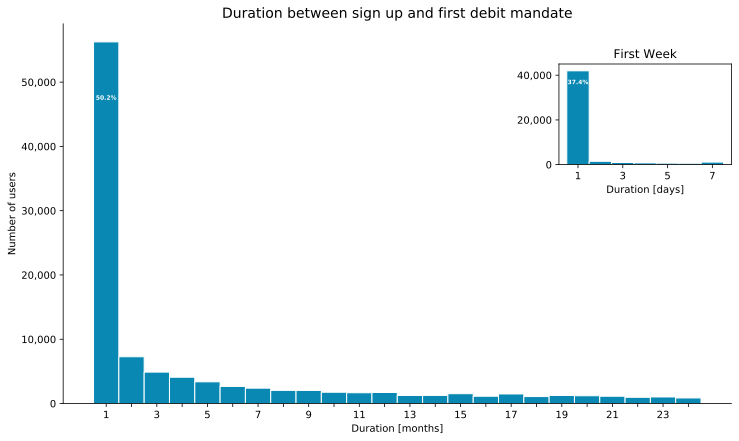

In [11]:
%config InlineBackend.figure_format = 'svg'
# create figure
fig, ax = plt.subplots(figsize=(12, 7))
# calculate percentage of first month monthly donors
first_month_percentage = (
    duration_til_mandate['phase_duration']/30).astype(int).value_counts(normalize=True).values[0]
# plot data
ax.hist(x=duration_til_mandate['phase_duration'],
        bins=np.arange(0, 25) * 30,
        color='#0888b2',
        edgecolor='white', align='left')
ax.set_xlabel('Duration [months]')
ax.set_ylabel('Number of users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()])
ax.set_xticks(np.arange(0, 24) * 30)
ax.set_xticklabels(['{:,}'.format(int(x/30)+1) for x in ax.get_xticks()])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
sns.despine(top=True, right=True, ax=ax)
# annotate percentage of first month monthly donors
ax.annotate(s="{0:.1%}".format(first_month_percentage),
            ha='center', color='white',
            fontweight='bold', fontsize=6,
            xy=(ax.get_xticks()[0], ax.get_ylim()[1] * 0.8))
ax.set_title('Duration between sign up and first debit mandate', size=14)
# calculate percentage of first day monthly donors
first_day_percentage = duration_til_mandate['phase_duration'].value_counts(
    normalize=True).values[0]
# create inset plot
ax2 = fig.add_axes([0.7, 0.6, 0.2, 0.2])
# plot first week data
ax2.hist(x=duration_til_mandate['phase_duration'],
         bins=[0, 1, 2, 3, 4, 5, 6, 7],
         color='#0888b2',
         edgecolor='white', align='left')
ax2.set_ylim([0, 45000])
ax2.set_xlabel('Duration [days]')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax2.set_yticklabels(ax2.get_yticks().astype(int))
ax2.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks()])
ax2.set_xticklabels(['{:,}'.format(int(x)+1) for x in ax2.get_xticks()])
# annotate percentage of first day monthly donors
ax2.annotate(s="{0:.1%}".format(first_day_percentage),
             ha='center', color='white',
             fontweight='bold', fontsize=6,
             xy=(ax2.get_xticks()[1], ax2.get_ylim()[1] * 0.8))
ax2.set_title('First Week')
plt.show()

Most of those that eventually become a monthly donor will do so during sign up. In fact, since January 2016 37.4% of all new users created their debit mandate on the date of their sign up, 50.2% did so within the first 30 days after their account creation.

### Monthly donations development

#### Statistical Overview

People wanting to donate can do so manually or via direct debit authorization. The donation value has to be in the range of at least 1€ to at most 9999€. Cent values are not allowed.

In [12]:
# statistics of all monthly donations
donations_all.describe()

,Donations
count,"1,879,683.00"
mean,4.20
std,3.86
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,420.00


As displayed above, the now almost 1,880,000 monthly donations consist of single sums in the range of 1€ to 420€. The mean donation value is (4.20$\pm$3.86)€. The interquartile range essentially shows that the middle 50% of Crowdhörnchen donate between 2€ to 5€ with a median of 3€. <br>
The difference between mean and median points to outliers in the fourth quartile (few high value donations).

#### How are the donation values distributed?

As shown MeinBGE and the UBIs depend mostly on small monthly donations of 5€ and less. The following graph shows how much these sums support them financially.

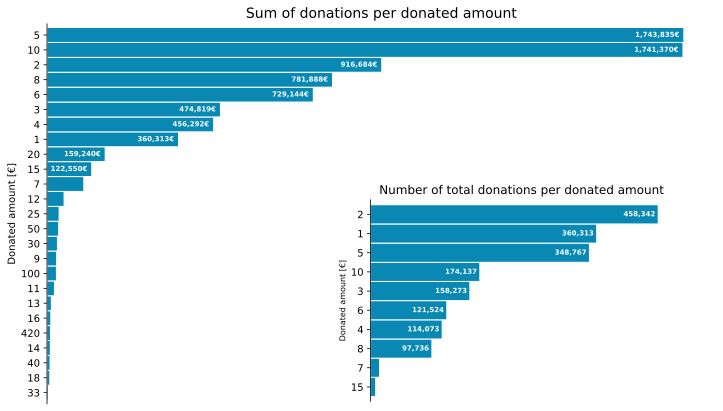

In [13]:
%config InlineBackend.figure_format = 'svg'
# create figure
fig, ax = plt.subplots(figsize=(12, 7))
# plot data
data_donation_value[-25:].plot(kind='barh', x='donation_value', y='total_donation_value',
                               color=['#0888b2'], width=1, edgecolor='white',
                               rot=0, ax=ax,
                               legend=False)
sns.despine(top=True, right=True, bottom=True)
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# annotate donation sums
for count, index in enumerate(data_donation_value[-10:].index):
    ax.text(x=data_donation_value.loc[index, 'total_donation_value']
            - data_donation_value['total_donation_value'].max() * 0.007,
            y=15 + count,
            s='{:,}€'.format(
                data_donation_value.loc[index, 'total_donation_value']),
            va='center', ha='right', color='white', weight='bold', size=7)
ax.set_ylabel('Donated amount [€]')
ax.set_title('Sum of donations per donated amount', size=14)
# total number of donations per value as inset graph
inset_data = data_donation_value.sort_values(
    by='num_total_donations', ascending=True).reset_index(drop=True)
# creat inset graph
ax_inset = fig.add_axes([0.5, 0.13, 0.35, 0.4])
# plot data
inset_data[-10:].plot(kind='barh', x='donation_value', y='num_total_donations',
                      color=['#0888b2'], width=1, edgecolor='white',
                      rot=0, ax=ax_inset,
                      legend=False)
sns.despine(top=True, right=True, bottom=True, ax=ax_inset)
ax_inset.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# annotate donation numbers
for count, index in enumerate(inset_data[-8:].index):
    ax_inset.text(x=inset_data.loc[index, 'num_total_donations']
                  - inset_data['num_total_donations'].max() * 0.01,
                  y=2 + count,
                  s='{:,}'.format(
                      inset_data.loc[index, 'num_total_donations']),
                  va='center', ha='right', color='white', weight='bold', size=7)
ax_inset.set_ylabel('Donated amount [€]', size=8)
ax_inset.set_title('Number of total donations per donated amount', size=12)
plt.show()

As shown above the highest numbers of donations for values belong to sums of 5€ and less. Although, there is a significant number of Crowdhörnchen that donate between 6€ and 10€. So much so, that the five highest donation sums are generated by mostly higher than 5€ donations. However, the most value is generated by 5€ and 10€ donation amounts which make up 65.5% of the total donation sum.

#### How much money is donated monthly into UBIs / to organisational work?

All donors can decide on the intended purpose of their donation. They can choose between the usage for organisational work (salaries, officies, etc.) and the distribution as UBI in the raffles.

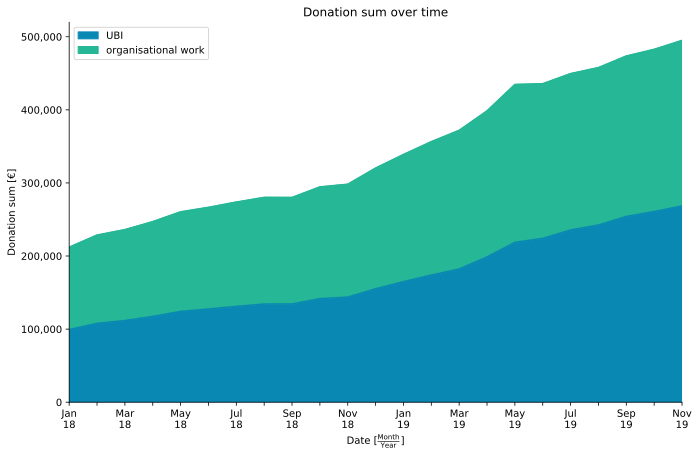

In [14]:
%config InlineBackend.figure_format = 'svg'
# create figure
fig, ax = plt.subplots(figsize=(11, 7))
# plot data
data_donation_monthly.plot(kind='area', x='Date',
                           y=['UBI', 'organisational work'], color=['#0888b2', '#26b796'], legend=True,
                           ax=ax)
ax.set_xticks(range(len(data_donation_monthly)))
ax.set_xticklabels(data_donation_monthly['Date'])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Donation sum over time')
ax.set_ylabel('Donation sum [€]')
ax.set_xlabel('Date ' + r'[$\frac{\mathrm{Month}}{\mathrm{Year}}$]')
sns.despine(ax=ax, top=True, right=True)
plt.show()

As the user base grows, more and more people willing to donate are joining the platform. This growth culminates in a more than doubled donation value more than doubled compared to January 2018. As of November 2019 there is a monthly donation sum of over half a million Euros (excluding single donations). The purpose split between organisational work and UBI is stable at about 50%, leading to more UBIs being distributed as well as a growing organisation.

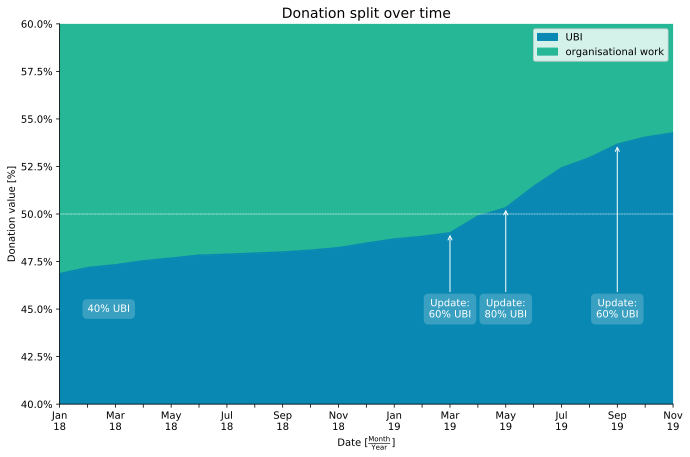

In [15]:
%config InlineBackend.figure_format = 'svg'
# create figure
fig, ax = plt.subplots(figsize=(11, 7))
# plot data
data_donation_perc = data_donation_monthly[['UBI',
                                            'organisational work']].divide(data_donation_monthly.sum(axis=1), axis=0)
data_donation_perc['Date'] = data_donation_monthly['Date']

data_donation_perc.plot(kind='area', x='Date', y=['UBI', 'organisational work'], color=['#0888b2', '#26b796'],
                        ax=ax, stacked=True)
ax.set_ylim([0.4, 0.6])
ax.set_xticks(range(len(data_donation_perc)))
ax.set_xticklabels(data_donation_perc['Date'])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(
    lambda x, p: format(str(round(x * 100, 1))) + '%'))
ax.set_ylabel('Donation value [%]')
ax.set_xlabel('Date ' + r'[$\frac{\mathrm{Month}}{\mathrm{Year}}$]')
sns.despine(ax=ax, top=True, right=True)
ax.axhline(y=0.5, xmin=ax.get_xticks().min(), xmax=ax.get_xticks().max(),
           linestyle='--', dash_capstyle='round', color='white', linewidth=0.5)
ax.text(x=1, y=0.45, s='40% UBI', va='center', ha='left', color='white', size=10,
        bbox=dict(facecolor='white', edgecolor='None', alpha=0.2, boxstyle='round,pad=0.5'))
# annotate split defaults
ax.annotate('Update:\n60% UBI',
            xy=(data_donation_perc[data_donation_perc['Date'] == 'Mar\n19'].index[0],
                data_donation_perc[data_donation_perc['Date'] == 'Mar\n19'].values[0, 0]), xycoords='data',
            xytext=(
                data_donation_perc[data_donation_perc['Date'] == 'Mar\n19'].index[0], 0.45),
            textcoords='data', size=10, color='white', va='center', ha='center',
            arrowprops=dict(arrowstyle='->', color='white'),
            bbox=dict(facecolor='white', edgecolor='None',
                      alpha=0.2, boxstyle='round,pad=0.5'),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('Update:\n80% UBI',
            xy=(data_donation_perc[data_donation_perc['Date'] == 'May\n19'].index[0],
                data_donation_perc[data_donation_perc['Date'] == 'May\n19'].values[0, 0]), xycoords='data',
            xytext=(
                data_donation_perc[data_donation_perc['Date'] == 'May\n19'].index[0], 0.45),
            textcoords='data', size=10, color='white', va='center', ha='center',
            arrowprops=dict(arrowstyle='->', color='white'),
            bbox=dict(facecolor='white', edgecolor='None',
                      alpha=0.2, boxstyle='round,pad=0.5'),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('Update:\n60% UBI',
            xy=(data_donation_perc[data_donation_perc['Date'] == 'Sep\n19'].index[0],
                data_donation_perc[data_donation_perc['Date'] == 'Sep\n19'].values[0, 0]), xycoords='data',
            xytext=(
                data_donation_perc[data_donation_perc['Date'] == 'Sep\n19'].index[0], 0.45),
            textcoords='data', size=10, color='white', va='center', ha='center',
            arrowprops=dict(arrowstyle='->', color='white'),
            bbox=dict(facecolor='white', edgecolor='None',
                      alpha=0.2, boxstyle='round,pad=0.5'),
            horizontalalignment='right', verticalalignment='top',
            )
ax.set_title('Donation split over time', size=14)
plt.show()

MeinBGE sets a default donation split in the form for selecting the donation amount during the donor sign-up, which each Crowdhörnchen can adjust individually. This default split was changed multiple times in 2019 after leaning 40% towards the UBI throughout 2018.
Following the updates in March and May 2019 with a stronger leaning towards the UBI the actual split in monthly donations also changed in favor of the raffle pot. This suggests that generally only a few people change the selection of the default split.

### Raffles

#### How many UBIs are raffled per month?

Since starting in 2014 MeinBGE has distributed 444 UBIs (as of November 2019). Because of the increased monthly donation sum for the raffle pot the number of possible UBIs per month has also risen.

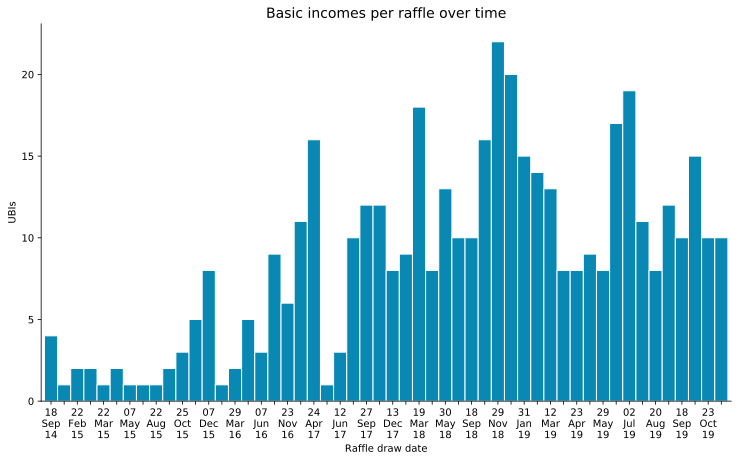

In [16]:
%config InlineBackend.figure_format = 'svg'
# create figure
fig, ax = plt.subplots(figsize=(12, 7))
# plot data
raffles_over_time.plot(kind='bar', x='draw_date', y='num_basic_incomes', color='#0888b2',
                       width=1, edgecolor='white', rot=0,
                       legend=False, ax=ax)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
ax.set_ylabel('UBIs')
ax.set_xlabel('Raffle draw date')
ax.set_title('Basic incomes per raffle over time', size=14)
plt.setp(ax.get_xticklabels()[1::2], visible=False)
sns.despine(top=True, right=True)
plt.show()

Starting with the initial 4 UBIs in 2014 the number of UBIs per raffle has steadily grown.<br> 
On 02.12.2019 (not included in the data) 42 UBIs (more than half a million euro) were raffled at once, which makes this the biggest raffle by 20 UBIs as of December 2019.

### Conclusion

This explorative analysis shows the growth of MeinBGE in relation to user base and monthly donation resulting in rising number of raffles and UBIs.

As the used data is purely quantitative it does not display a full picture. More qualitative studies of user and donor motivation and why/how users come in contact with the UBI is needed for further understanding of the motives behind the data.

From an analytical point of view this analysis can be expanded for example by factoring in an overview of bank data after debit collection (e.g. fees, how many debits bounce, etc.).